## Análise exploratória dos dados 
- Realizada a partir da contagem de atributos em cada trabalho mapeado

In [8]:
#Importação de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import requests
import io
warnings.filterwarnings("ignore")

In [9]:
#Importando o csv
df = pd.read_csv('Datasets/pp_ArtigoEventos.csv')

In [10]:
#eliminando o index Unnamed: 0 
df = df.iloc[:,1:]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Articles                     186 non-null    object
 1   Fonte_de_dados               186 non-null    object
 2   Natureza_dos_dados           186 non-null    object
 3   Ferramenta_e_Tecnologia      186 non-null    object
 4   Pre_processamento            186 non-null    object
 5   Tarefa                       186 non-null    object
 6   Ambiente_de_desenvolvimento  186 non-null    object
 7   Tecnicas_utilizadas          186 non-null    object
 8   Metricas                     186 non-null    object
 9   Discussao_e_resultados_      156 non-null    object
 10  Repositorio                  186 non-null    object
 11  Evento                       186 non-null    object
dtypes: object(12)
memory usage: 17.6+ KB


# Informações dos Eventos

## 1. Publicações por ano

In [12]:
#criando uma cópia do df
df2 = df.copy()

In [13]:
#separando o ano do nome do evento
df2['Year'] = df2['Evento'].apply(lambda x: str(x).split('_')[-1])

In [14]:
#separando nome do evento do ano
df2['Evento'] = df2['Evento'].apply(lambda x: str(x).split('_')[0])

In [15]:
df2['Evento'] = df2['Evento'].replace({
    'eniac': 'ENIAC',
    'bracis': 'BRACIS',
    'brasnam': 'BraSNAM',
    'stil': 'STIL',
    'propor': 'PROPOR'})

In [16]:
df2.Year.value_counts()

2021    87
2020    54
2022    45
Name: Year, dtype: int64

In [17]:
#df2f=df2.rename(columns={'Evento': 'Event'})

In [18]:
#Agrupando Evento e ano
grouped = df2.groupby(['Evento','Year']).count()

In [19]:
#grouped

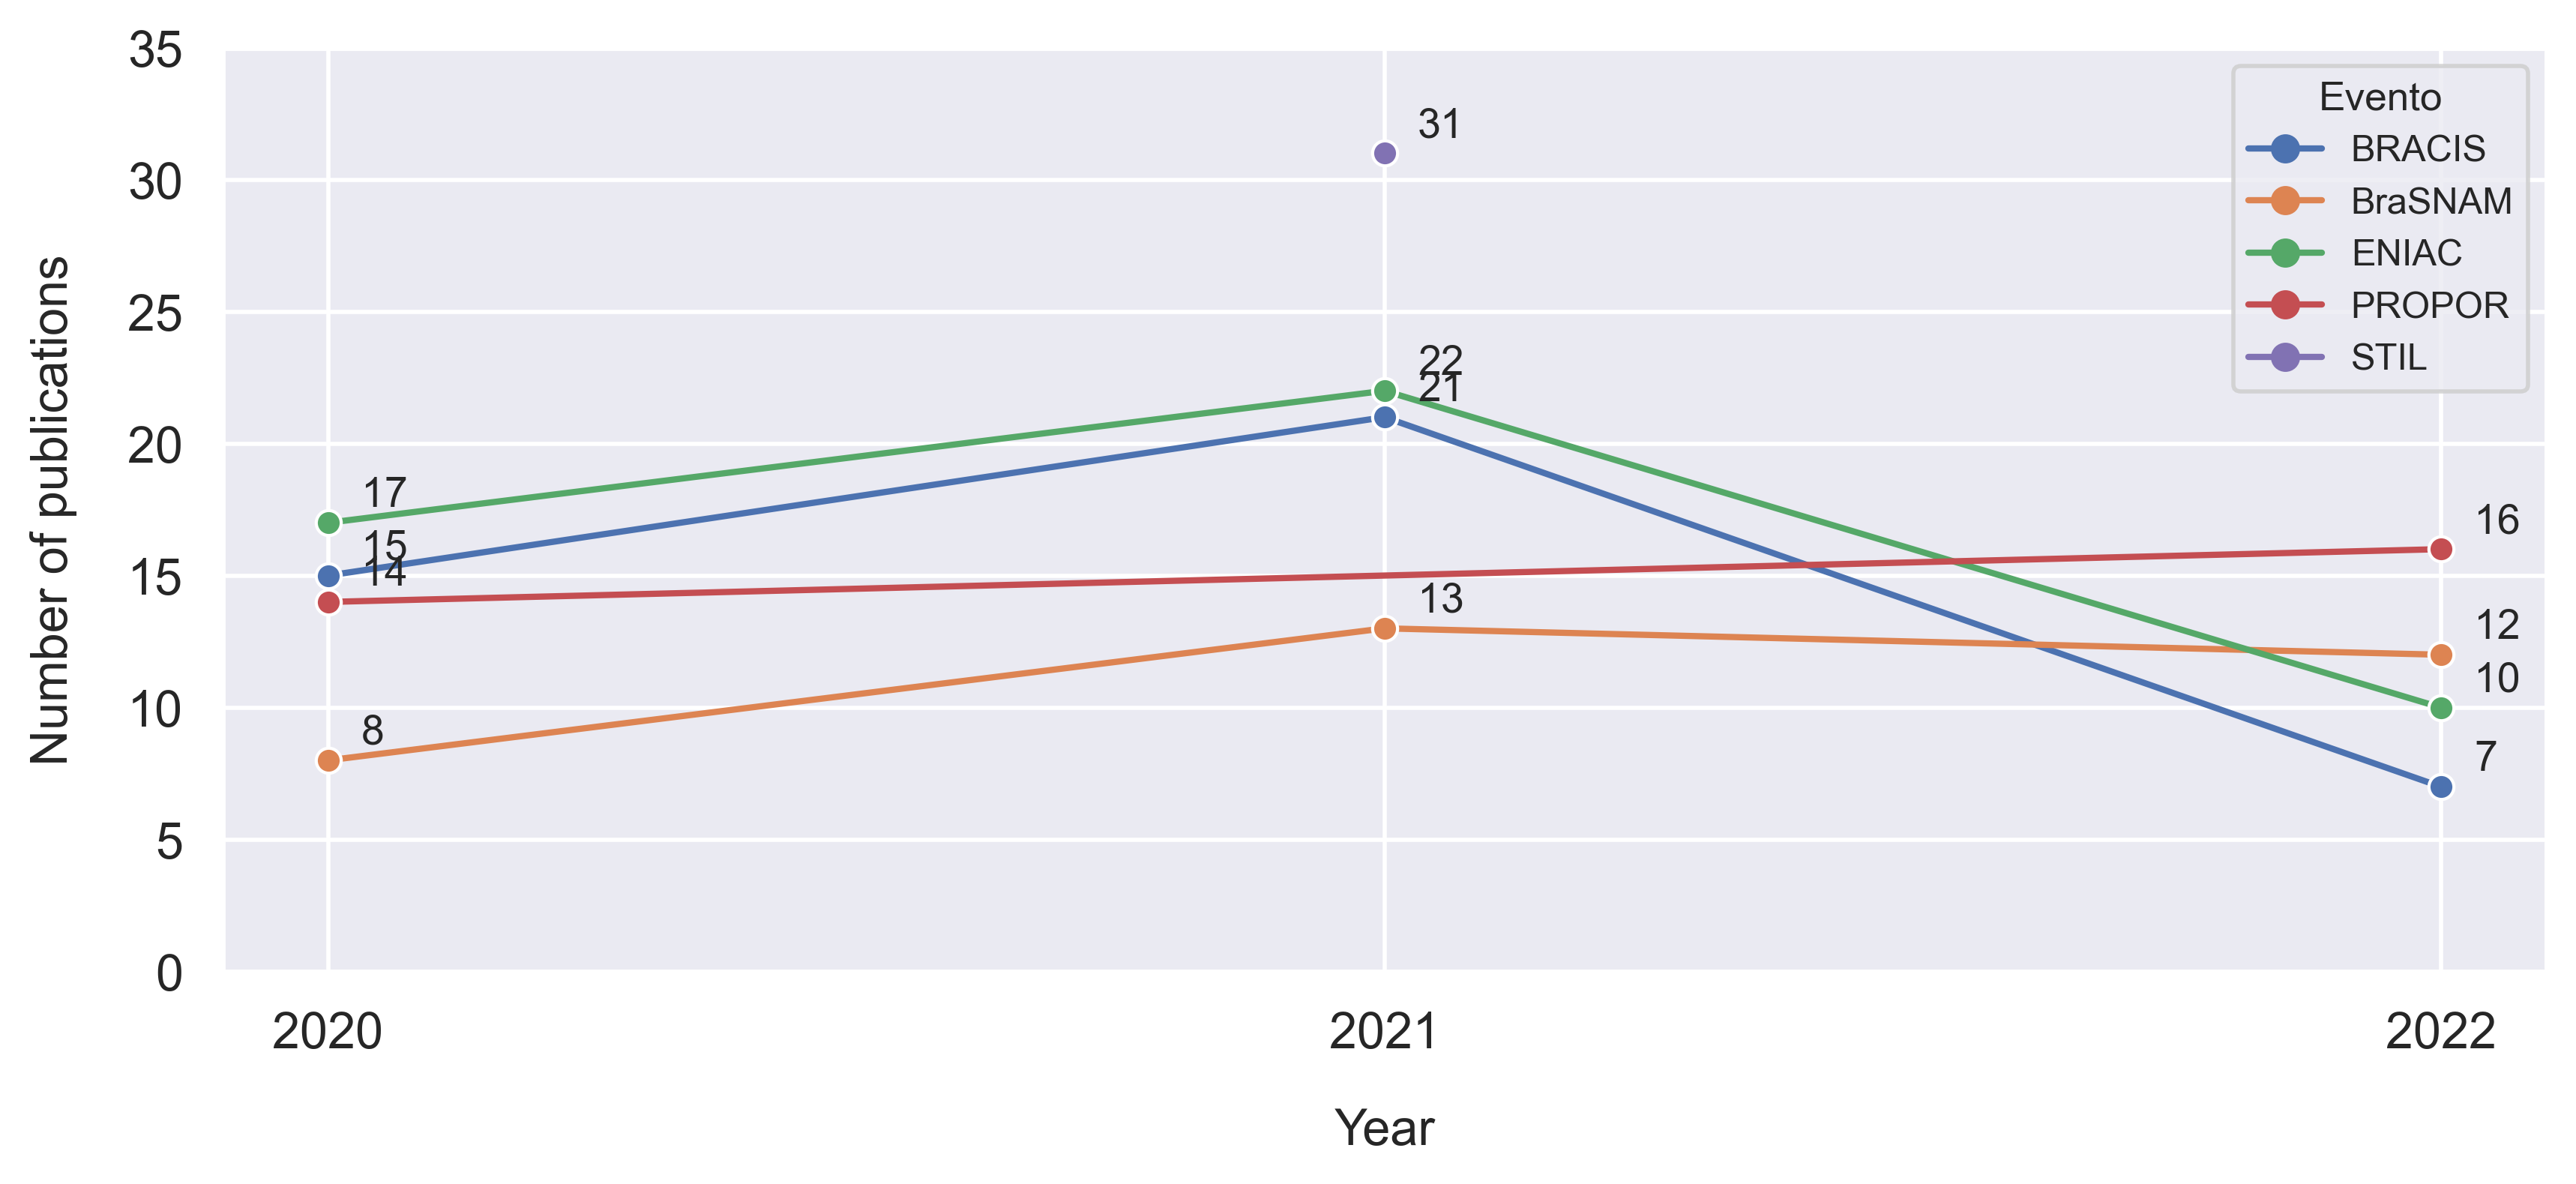

In [21]:
sns.set(font_scale = 0.8,font='sans serif')
plt.figure(figsize=(10,4), dpi=400, facecolor='#FFF')
#sns.set_theme()
#sns.set_style("whitegrid")

f=sns.lineplot(data=grouped, x="Year", y="Articles", hue="Evento", marker='o')

#exibir números
for line in f.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        f.annotate(str(int(y)), xy=(x, y), xytext=(8, 4), textcoords='offset points', fontsize=10)
        
for h in f.legend_.legendHandles: 
    h.set_marker('o')
              
f.set_yticks(range(0, 40, 5))
f.set_title('',fontsize = 20)
f.set_xlabel('Year',fontsize=12, labelpad=12)
f.set_ylabel('Number of publications', fontsize=12, labelpad=12)
f.tick_params(labelsize=12)
#f.legend(fontsize='11')


#plt.savefig('Resultados/PublicacoesxAnoL.png')

## 2. Ferramentas e Tecnologias

### Contagem das ferramentas por trabalho

In [22]:
import collections
from collections import Counter

#Transformando a coluna em uma lista
lista = df['Ferramenta_e_Tecnologia'].tolist()
#Removendo as aspas da lista
lista1 = ','.join(lista).replace("'","")
#Dividindo cada linha da lista através das vírgulas
palavras = lista1.split(',')

#Usando a biblioteca Counter para contar cada elemento (palavra)
contar_fer = Counter(palavras)#.most_common()
contar_fer = Counter({chave: valor for chave, valor in contar_fer.items() if chave != ''})
#contar_fer

In [23]:
len(contar_fer)

136

In [24]:
#As 10 mais frequentes 
list_fer = Counter(palavras).most_common()
list_fer [:10]

[('scikit-learn', 55),
 ('nltk', 39),
 ('nao descrito', 36),
 ('spacy', 23),
 ('hugging face', 17),
 ('keras', 12),
 ('pytorch', 11),
 ('gensim', 9),
 ('tensorflow', 9),
 ('nilc', 7)]

In [25]:
count_fer = [('Scikit-Learn', 55),
 ('NLTK', 39),
 ('Not described', 36),
 ('spaCy', 23),
 ('Hugging Face', 17),
 ('Keras', 12),
 ('PyTorch', 11),
 ('Gensim', 9),
 ('TensorFlow', 9),
 ('NILC', 7)]
#  ('Tweepy', 6),
#  ('Pandas', 6),
#  ('FastText', 6),
#  ('Beautiful Soup', 5),
#  ('Linear Kernel', 5),
#  ('Transformers', 5),
#  ('Regex', 4),
#  ('WordCloud', 3),
#  ('Gephi', 3),
#  ('CoGrOO', 3)]

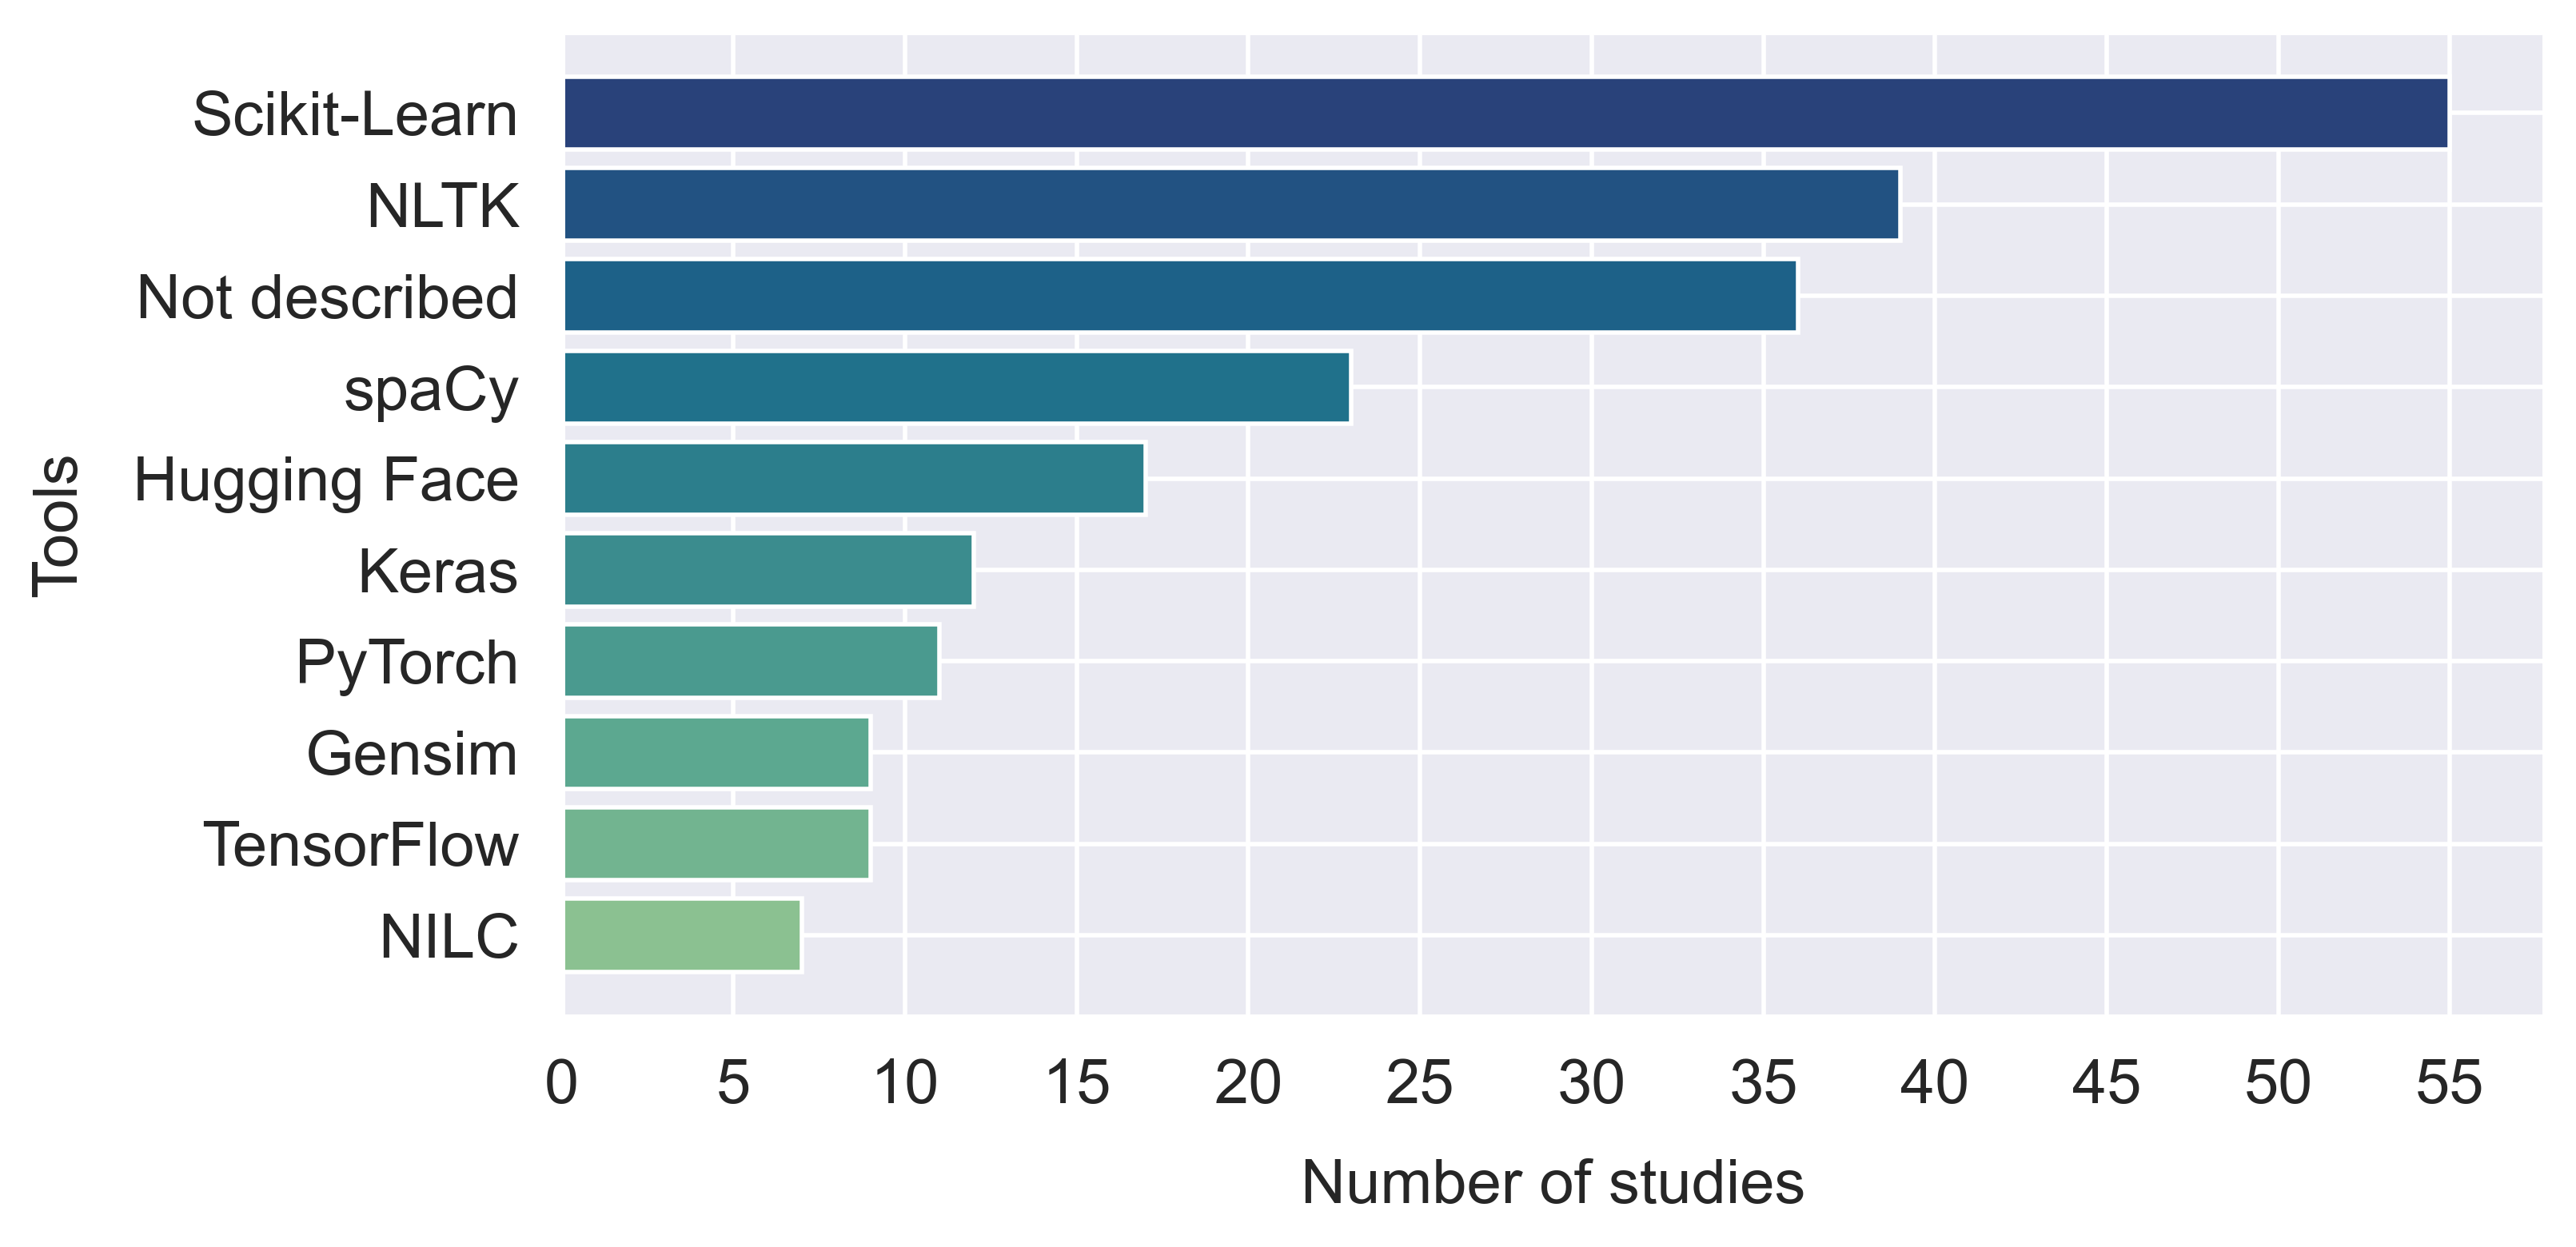

In [26]:
palette = sns.color_palette("crest", n_colors=10)
sns.set(style="darkgrid")

plt.subplots(figsize=(8,4), dpi=400)
             
y_ferr = [palavra for Qty, palavra in count_fer]
x_ferr = [Qty for Qty, palavra in count_fer]

y_ferr.reverse()
x_ferr.reverse()

plt.barh(x_ferr, y_ferr, color=palette)
plt.title("", fontsize=15)
plt.ylabel("Tools", fontsize=14, labelpad=10)
plt.xlabel("Number of studies", fontsize=14, labelpad=10)
plt.tick_params(labelsize=14)
# plt.show()

plt.xticks(range(0, 60, 5))
plt.show()
#plt.savefig('Resultados/10Ferramentas.png')

### Contagem de técnicas

In [63]:
import collections
from collections import Counter

#Transformando a coluna em uma lista
lista2 = df['Tecnicas_utilizadas'].tolist()
#Removendo as aspas da lista
lista3 = ','.join(lista2).replace("'", "")
#Dividindo cada linha da lista através das vírgulas
palavras2 = lista3.split(',')

#Usando a biblioteca Counter para contar cada elemento (palavra)
contar_tec = Counter(palavras2)#.most_common()
contar_tec= Counter({chave: valor for chave, valor in contar_tec.items() if chave != ''})

#contar_tec

In [64]:
len(contar_tec)

275

In [65]:
list_tec = Counter(palavras2).most_common()
list_tec [:20]

[('bert', 63),
 ('tf-idf', 58),
 ('word embeddings', 53),
 ('support vector machine (svm)', 48),
 ('naive bayes (nb)', 42),
 ('random forest (rf)', 36),
 ('bertimbau', 32),
 ('bag-of-words (bow)', 32),
 ('word2vec', 29),
 ('lstm', 29),
 ('named entity recognition (ner)', 26),
 ('logistic regression (lr)', 26),
 ('otimizador adamw', 25),
 ('decision tree classifier (dtc)', 21),
 ('glove', 20),
 ('k-nearest neighbor (knn)', 20),
 ('multi-layer perceptron (mlp)', 20),
 ('part-of-speech tags (pos tags)', 18),
 ('fasttext', 16),
 ('cnn', 16)]

In [66]:
count_tec=[('BERT', 63),
 ('TF-IDF', 58),
 ('Word embedding', 53),
 ('SVM', 48),
 ('Naive Bayes', 42),
 ('RF', 36),
 ('BoW', 32),
 ('BERTimbau', 32),
 ('Word2Vec', 29),           
 ('LSTM', 29),
 ('NER', 26),
 ('LR', 26),
 ('Adam Optimizer', 25),
 ('DTC', 21),
 ('GloVe', 20),
 ('KNN', 20),
 ('MLP', 20),
 ('(POS) tagging', 18),
 ('fastText', 16),
 ('CNN', 16)]


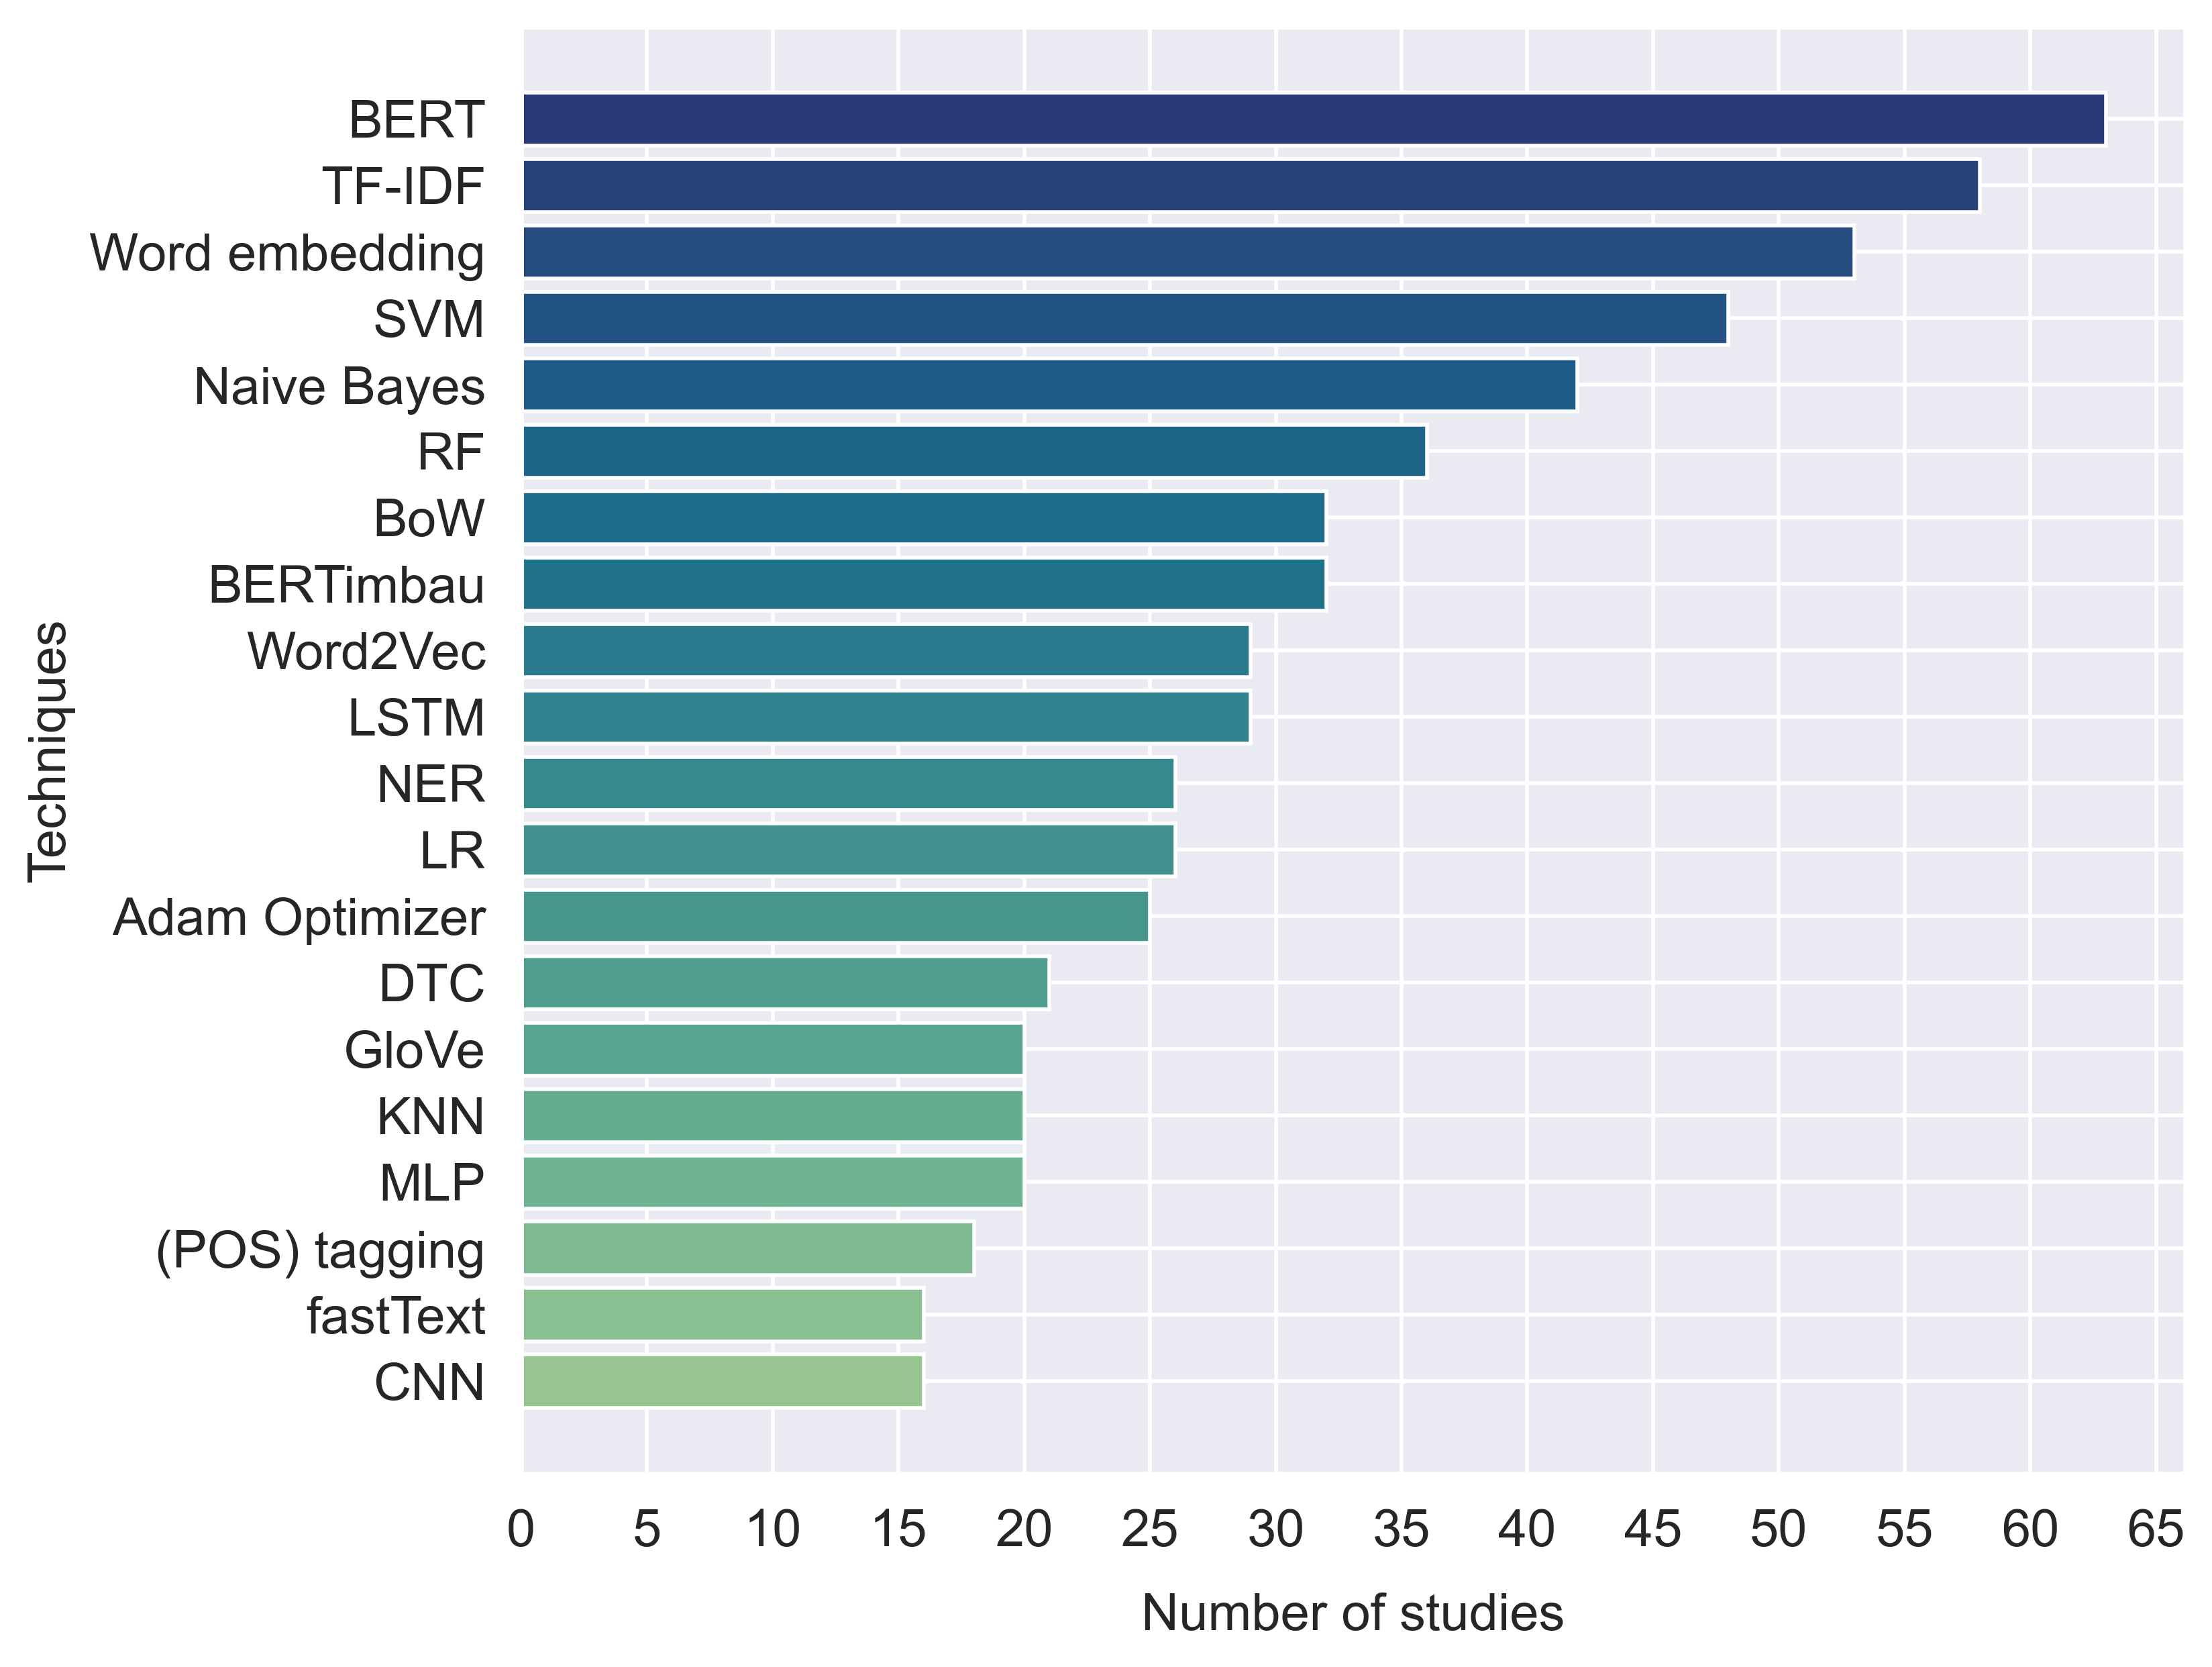

In [67]:
palette = sns.color_palette("crest", n_colors=20)
sns.set(style="darkgrid")


plt.subplots(figsize=(8,7), dpi=400)

y = [palavra for Qty, palavra in count_tec]
x = [Qty for Qty, palavra in count_tec]

y.reverse()
x.reverse()

plt.barh(x, y, color=palette)
plt.title("", fontsize=15)
plt.ylabel("Techniques", fontsize=14)
plt.xlabel("Number of studies", fontsize=14, labelpad=10)
plt.tick_params(labelsize=14)
plt.xticks(range(0, 70, 5))
plt.show()
#plt.savefig('Resultados/20técnicas.png')

## 3. Técnicas por evento

Foi criado um dataframe para cada evento

### Dataframe BraSNAM

In [88]:
df_brasnam = df[df['Evento'].isin(['brasnam_2020','brasnam_2021','brasnam_2022'])]

In [27]:
#df_brasnam.info()

In [90]:
import collections
from collections import Counter

#Transformando a coluna em uma lista
lista4 = df_brasnam['Tecnicas_utilizadas'].tolist()
#Removendo as aspas da lista
lista5 = ','.join(lista4).replace("'", "")
#Dividindo cada linha da lista através das vírgulas
palavras3 = lista5.split(',')

#Usando a biblioteca Counter para contar cada elemento (palavra)
contar_tec_bras = Counter(palavras3)#.most_common()

### Dataframe ENIAC

In [28]:
df_eniac = df[df['Evento'].isin(['eniac_2020','eniac_2021','eniac_2022'])]
#df_eniac.info()

In [92]:
import collections
from collections import Counter

#Transformando a coluna em uma lista
lista6 = df_eniac['Tecnicas_utilizadas'].tolist()
#Removendo as aspas da lista
lista7 = ','.join(lista6).replace("'", "")
#Dividindo cada linha da lista através das vírgulas
palavras4 = lista7.split(',')

#Usando a biblioteca Counter para contar cada elemento (palavra)
contar_tec_eniac = Counter(palavras4)#.most_common()

### Dataframe STIL

In [29]:
df_stil = df[df['Evento'].isin(['stil_2021'])]

#df_stil.info()

In [94]:
import collections
from collections import Counter

#Transformando a coluna em uma lista
lista8 = df_stil['Tecnicas_utilizadas'].tolist()
#Removendo as aspas da lista
lista9 = ','.join(lista8).replace("'", "")
#Dividindo cada linha da lista através das vírgulas
palavras5 = lista9.split(',')

#Usando a biblioteca Counter para contar cada elemento (palavra)
contar_tec_stil = Counter(palavras5)#.most_common()

### Dataframe BRACIS

In [30]:
df_bracis = df[df['Evento'].isin(['bracis_2020','bracis_2021','bracis_2022'])]

#df_bracis.info()

In [96]:
import collections
from collections import Counter

#Transformando a coluna em uma lista
lista10 = df_bracis['Tecnicas_utilizadas'].tolist()
#Removendo as aspas da lista
lista11 = ','.join(lista10).replace("'", "")
#Dividindo cada linha da lista através das vírgulas
palavras6 = lista11.split(',')

#Usando a biblioteca Counter para contar cada elemento (palavra)
contar_tec_bracis = Counter(palavras6)#.most_common()

### Dataframe PROPOR

In [31]:
df_propor = df[df['Evento'].isin(['propor_2020','propor_2022'])]

#df_propor.info()

In [98]:
import collections
from collections import Counter

#Transformando a coluna em uma lista
lista12 = df_propor['Tecnicas_utilizadas'].tolist()
#Removendo as aspas da lista
lista13 = ','.join(lista12).replace("'", "")
#Dividindo cada linha da lista através das vírgulas
palavras7 = lista13.split(',')

#Usando a biblioteca Counter para contar cada elemento (palavra)
contar_tec_propor = Counter(palavras7)#.most_common()

### Comparando quantidade de técnicas por evento

In [99]:
##Filtrando nome das técnicas mais frequentes em todos os eventos
x_group = [Qty for Qty, palavra in contar_tec.most_common(10)]
grupos = x_group [:10]
grupos

['bert',
 'tf-idf',
 'word embeddings',
 'support vector machine (svm)',
 'naive bayes (nb)',
 'random forest (rf)',
 'bertimbau',
 'bag-of-words (bow)',
 'word2vec',
 'lstm']

In [100]:
grupos = ['bert',
 'bertimbau',
 'word embeddings',
 'word2vec',
 'tf-idf',
 'bag-of-words (bow)',
 'lstm',
 'support vector machine (svm)',
 'random forest (rf)',
 'naive bayes (nb)']

In [101]:
group_dic=['BERT',
 'BERTimbau',
 'Word embedding',
 'Word2vec',
 'TF-IDF',
 'BoW',
 'LSTM',
 'SVM',           
 'RF',
 'Naive Bayes']

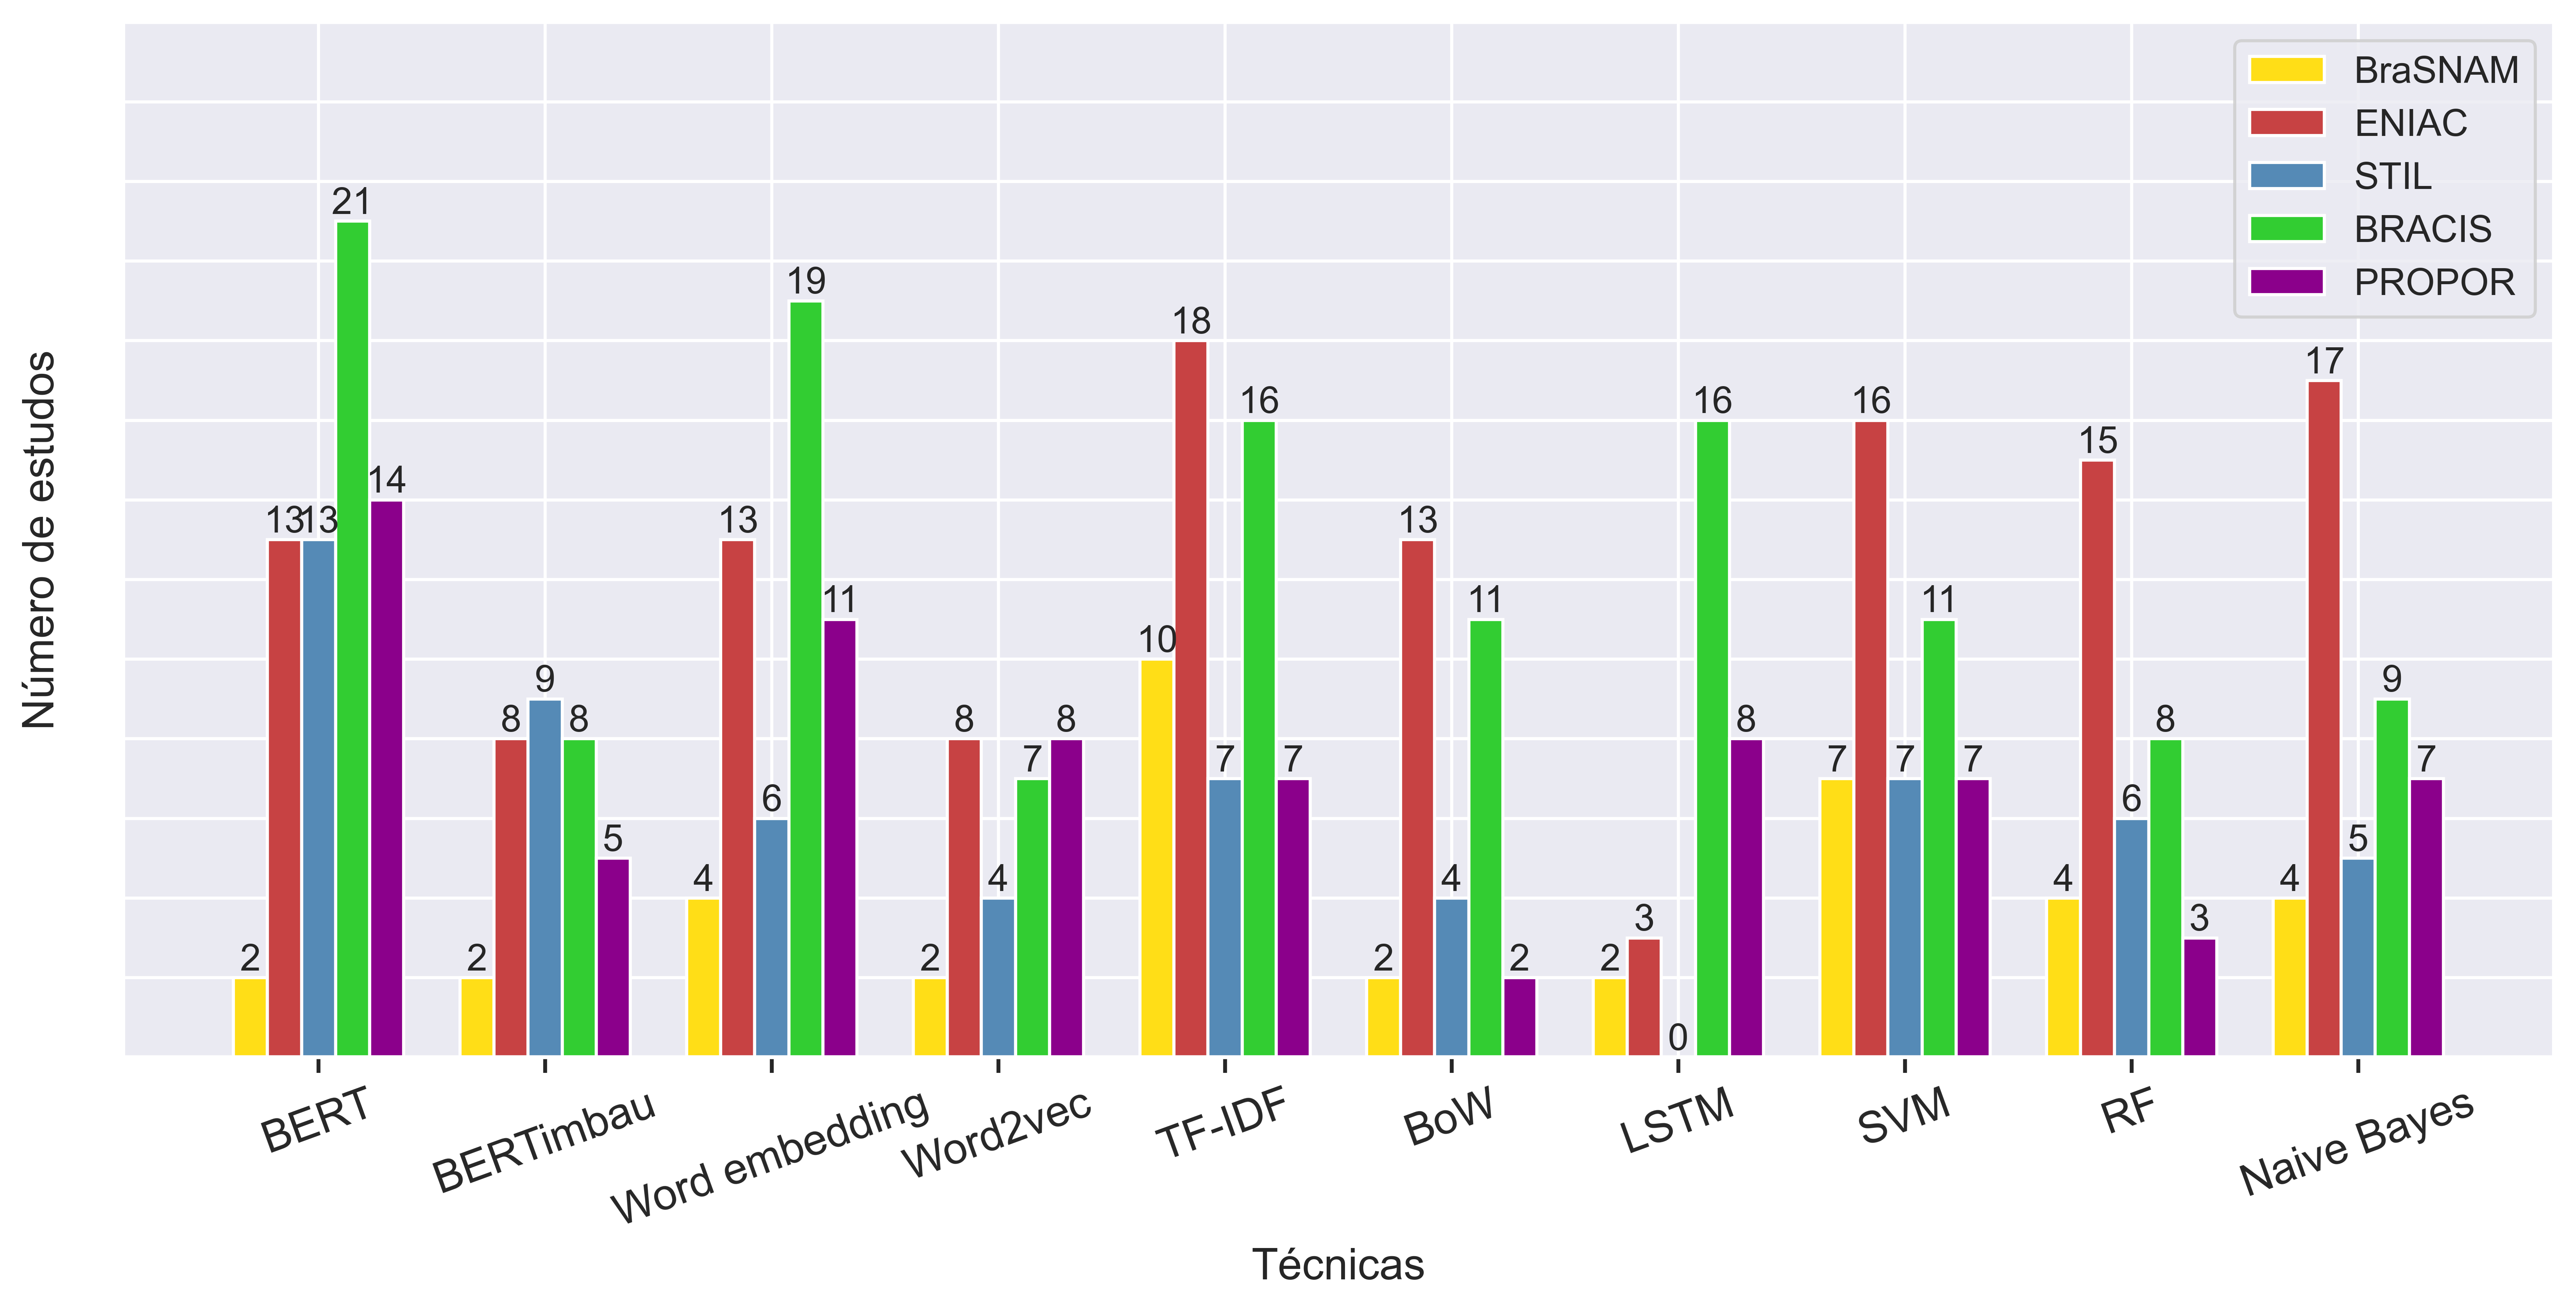

In [102]:
import matplotlib.pyplot as plt
import numpy as np

##quantidade das 10 mais frequentes técnicas no Counter de cada evento
qty_bras = list(map(lambda x: contar_tec_bras[x],grupos))
qty_eniac = list(map(lambda x: contar_tec_eniac[x],grupos))
qty_stil = list(map(lambda x: contar_tec_stil[x],grupos))
qty_bracis = list(map(lambda x: contar_tec_bracis[x],grupos))
qty_propor = list(map(lambda x: contar_tec_propor[x],grupos))

##largura das barras
largura = 0.15

##índice das barras
x_bras = np.arange(len(grupos))
x_eniac = [b + largura for b in x_bras]
x_stil = [e + largura for e in x_eniac]
x_bracis = [r + largura for r in x_stil]
x_propor = [p + largura for p in x_bracis]

fig, ax = plt.subplots(figsize=(14,6), dpi=600)

##gráfico de barras
bar_label_bras = ax.bar(x_bras, qty_bras, largura, color='#ffde17', label='BraSNAM')
bar_label_eniac = ax.bar(x_eniac, qty_eniac, largura, color='#c74243', label='ENIAC')
bar_label_stil = ax.bar(x_stil, qty_stil, largura, color='#558AB6', label='STIL')
bar_label_bracis = ax.bar(x_bracis, qty_bracis, largura, color='#32CD32', label='BRACIS')
bar_label_propor = ax.bar(x_propor, qty_propor, largura, color='#8B008B', label='PROPOR')

#sns.set_palette("pastel")

##mostrar valor das barras
ax.bar_label(bar_label_bras)
ax.bar_label(bar_label_eniac)
ax.bar_label(bar_label_stil)
ax.bar_label(bar_label_bracis)
ax.bar_label(bar_label_propor)

##rótulos do eixo x com técnicas mais presentes no eniac
ax.set_xticks([s + largura + 0.15 for s in range(len(grupos))],group_dic, rotation=20)
ax.tick_params(axis='x', which='major', length=5, bottom=True)

ax.set_ylabel("Número de estudos", fontsize=14, labelpad=10)
ax.set_xlabel("Técnicas", fontsize=14)
ax.set_title('')
plt.yticks(range(0, 27, 2))
ax.set_yticklabels([])
plt.tick_params(labelsize=14)
ax.legend(loc='upper right', fontsize='12')
plt.show()
#plt.savefig('Resultados/tec_por_evento.png')

## 4. Tarefas

### Criando um dataframe só para as tarefas de classificação

In [32]:
df3 = df[df['Tarefa'].str.contains('classificacao', na=False)]

In [33]:
#extraindo as strings que estão entre parênteses 
df3['Classificacao'] = df3['Tarefa'].apply(lambda x: str(x).split(',classificacao (', 1)[-1].split('classificacao (', 2)[-1].split('),')[0])

In [34]:
#df2['Classificacao'] = df2['Tarefa'].apply(lambda x: str(x).split('classificacao (')[-1] if x!='classificacao (' else np.nan)
df3['Classificacao'] = df3['Classificacao'].apply(lambda x: str(x).split(')')[0])

In [35]:
#df3.head()

Contando somente as strings de classificação:

In [36]:
list_tar = df3['Classificacao'].tolist()
list1 = ','.join(list_tar).replace("'","")
classificacao = list1.split(',')
contar_classif = Counter(classificacao)#.most_common()
#contar_classif

In [37]:
list_tasks = Counter(classificacao).most_common()
list_tasks [:10]

[('treinamento e teste de dados', 107),
 ('rotulagem de dados', 49),
 ('extracao de caracteristicas', 44),
 ('analise de sentimentos', 31),
 ('identificacao de polaridade', 27),
 ('identificacao de classes gramaticais', 20),
 ('balanceamento de dados', 19),
 ('identificacao de entidades', 15),
 ('identificacao de sentencas', 10),
 ('anotacao morfossintatica', 7)]

In [38]:
contar_classify = [('Train and Test datasets', 107),
 ('Labeled data', 49),
 ('Feature extraction', 44),
 ('Sentiment analysis', 31),
 ('Polarity identification', 27),
 ('Identify the Parts of Speech', 20),
 ('Data balancing', 19),
 ('Entity identification', 15),
 ('Identification of sentences', 10),
 ('Morphosyntactic annotation', 7)]

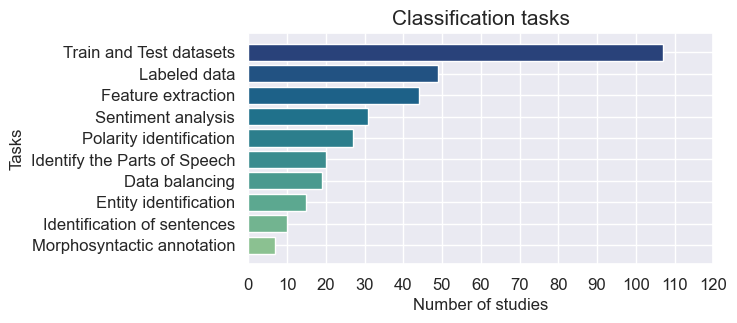

In [39]:
plt.subplots(figsize=(6,3))

y_class = [palavra for Qty, palavra in contar_classify]
x_class = [Qty for Qty, palavra in contar_classify]

y_class.reverse()
x_class.reverse()

plt.barh(x_class, y_class, color=palette)
plt.title("Classification tasks", fontsize=15)
plt.ylabel("Tasks", fontsize=12)
plt.xlabel("Number of studies", fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(range(0, 130, 10))
plt.show()
#plt.savefig('Resultados/Classification_tasks.png')

anotação manual: atribuição individual de rótulos por seres humanos para cada exemplo de dados, 
rotulagem manual: abordagem parcialmente automatizada em que apenas uma parte dos dados é rotulada manualmente 
e os rótulos são propagados para o restante dos exemplos com base em algoritmos 

### Contagem das outras tarefas

In [ ]:
#df3['outras_Tarefas'] = df['Tarefa'].apply(lambda x: str(x).split(',classificacao (', 1)[0].split('),')[-1].split('classificacao (')[0])

### Tarefas de Pré-processamento
 

In [40]:
df4 = df.copy()

In [41]:
#df4.Pre_processamento.value_counts()

In [42]:
#df4['Pre_processamento'] = df['Pre_processamento'].apply(lambda x: str(x).split('remocao (', 1)[-1].split(',remocao (', 2)[0].split('),')[-1])

### Criando um dataframe só para as tarefas remoção

In [43]:
df4 = df[df['Pre_processamento'].str.contains('remocao', na=False)]

In [44]:
#extraindo as strings que estão entre parênteses 
df4['Remocao_prep'] = df4['Pre_processamento'].apply(lambda x: str(x).split(',remocao (', 1)[-1].split('remocao (', 2)[-1].split('),')[0])

In [45]:
df4['Remocao_prep'] = df4['Remocao_prep'].apply(lambda x: str(x).split(')')[0])
#df4.head()

In [46]:
list_remov = df4['Remocao_prep'].tolist()
list2 = ','.join(list_remov).replace("'","")
remocao = list2.split(',')
contar_remov = Counter(remocao)#.most_common()
#contar_remov

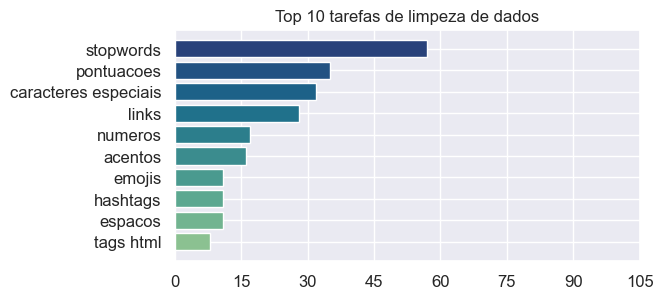

In [47]:
plt.subplots(figsize=(6,3))

y_remov = [palavra for Qty, palavra in contar_remov.most_common(10)]
x_remov = [Qty for Qty, palavra in contar_remov.most_common(10)]

y_remov.reverse()
x_remov.reverse()

plt.barh(x_remov, y_remov, color=palette)
plt.title("Top 10 tarefas de limpeza de dados", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xlabel("", fontsize=12)
plt.tick_params(labelsize=12)
# plt.show()

plt.xticks(range(0, 120, 15))
plt.show()

#### Outras tarefas de pré-processamento

In [48]:
df5=df.copy()

In [49]:
df5['outros_prep'] = df['Pre_processamento'].apply(lambda x: str(x).split('),')[-1].split('remocao (')[0].split(', remocao (')[0])

In [50]:
list_prep = df5['outros_prep'].tolist()
list3 = ','.join(list_prep).replace("'","")
preprocess = list3.split(',')
contar_prep = Counter(preprocess)#.most_common()
contar_prep = Counter({chave: valor for chave, valor in contar_prep.items() if chave != ''})

#contar_prep

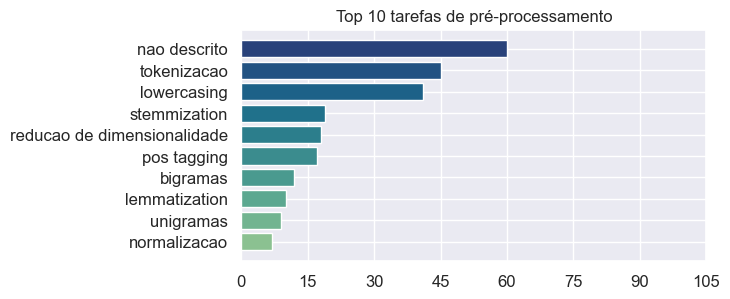

In [51]:
plt.subplots(figsize=(6,3))

y_pp = [palavra for Qty, palavra in contar_prep.most_common(10)]
x_pp = [Qty for Qty, palavra in contar_prep.most_common(10)]

y_pp.reverse()
x_pp.reverse()

plt.barh(x_pp, y_pp, color=palette)
plt.title("Top 10 tarefas de pré-processamento", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xlabel("", fontsize=12)
plt.tick_params(labelsize=12)
# plt.show()

plt.xticks(range(0, 120, 15))
plt.show()

### Criando lista das tarefas de pré-processamento mais relevantes e frequêntes:

In [52]:
list_prepro = [('Not described', 60),
 ('Remoção de stopwords', 57),
 ('Tokenization', 45),
 ('Lowercasing', 41),
 ('Removal special characters', 32),
 ('Stemmization', 19),
 ('Dimensionality reduction', 18),
 ('POS tagging', 17),
 ('Bigrams', 12),
 ('Lemmatization', 11)]

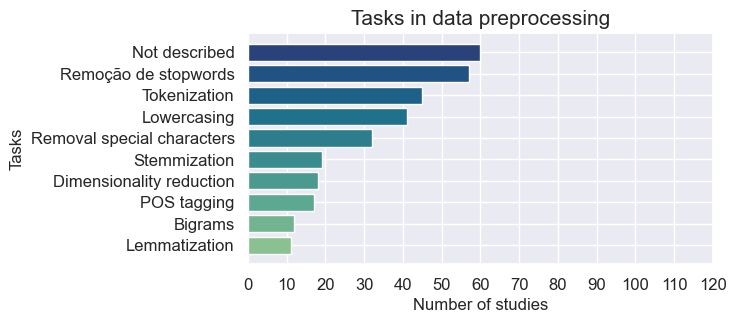

In [53]:
plt.subplots(figsize=(6,3))

y_class = [palavra for Qty, palavra in list_prepro]
x_class = [Qty for Qty, palavra in list_prepro]

y_class.reverse()
x_class.reverse()

plt.barh(x_class, y_class, color=palette)
plt.title("Tasks in data preprocessing", fontsize=15)
plt.ylabel("Tasks", fontsize=12)
plt.xlabel("Number of studies", fontsize=12)
plt.tick_params(labelsize=12)
plt.xticks(range(0, 130, 10))
plt.show()
#plt.savefig('Resultados/preprocessing_tasks.png')

## 5. Medidas de avaliação 

In [54]:
list_metr = df['Metricas'].tolist()
list4 = ','.join(list_metr).replace("'","")
metrics = list4.split(',')
contar_metr = Counter(metrics)#.most_common()
contar_metr = Counter({chave: valor for chave, valor in contar_metr.items() if chave != ''})
#contar_metr

In [55]:
#contar_metr.most_common()

In [56]:
len(contar_metr)

102

In [65]:
list_metric=[('F1-score', 108),
 ('Recall', 81),
 ('Precision', 78),
 ('Cross-validation', 59),
 ('Accuracy', 55),
 ('Cosine similarity', 22),
 ('Not described', 14),
 ('Area Under the Curve (AUC)', 13),
 ("Cohen's kappa", 12),
 ('Cross-entropy', 11)]

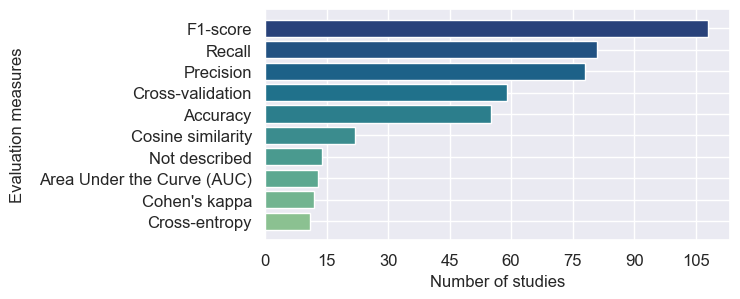

In [63]:
plt.subplots(figsize=(6,3))

y_metr = [palavra for Qty, palavra in list_metric]
x_metr = [Qty for Qty, palavra in list_metric]

y_metr.reverse()
x_metr.reverse()

plt.barh(x_metr, y_metr, color=palette)
#plt.title("Evaluation measures", fontsize=12)
plt.ylabel("Evaluation measures", fontsize=12, labelpad=10)
plt.xlabel("Number of studies", fontsize=12)
plt.tick_params(labelsize=12)
# plt.show()

plt.xticks(range(0, 120, 15))
plt.show()
#plt.savefig('Resultados/Evaluation_measures.png')

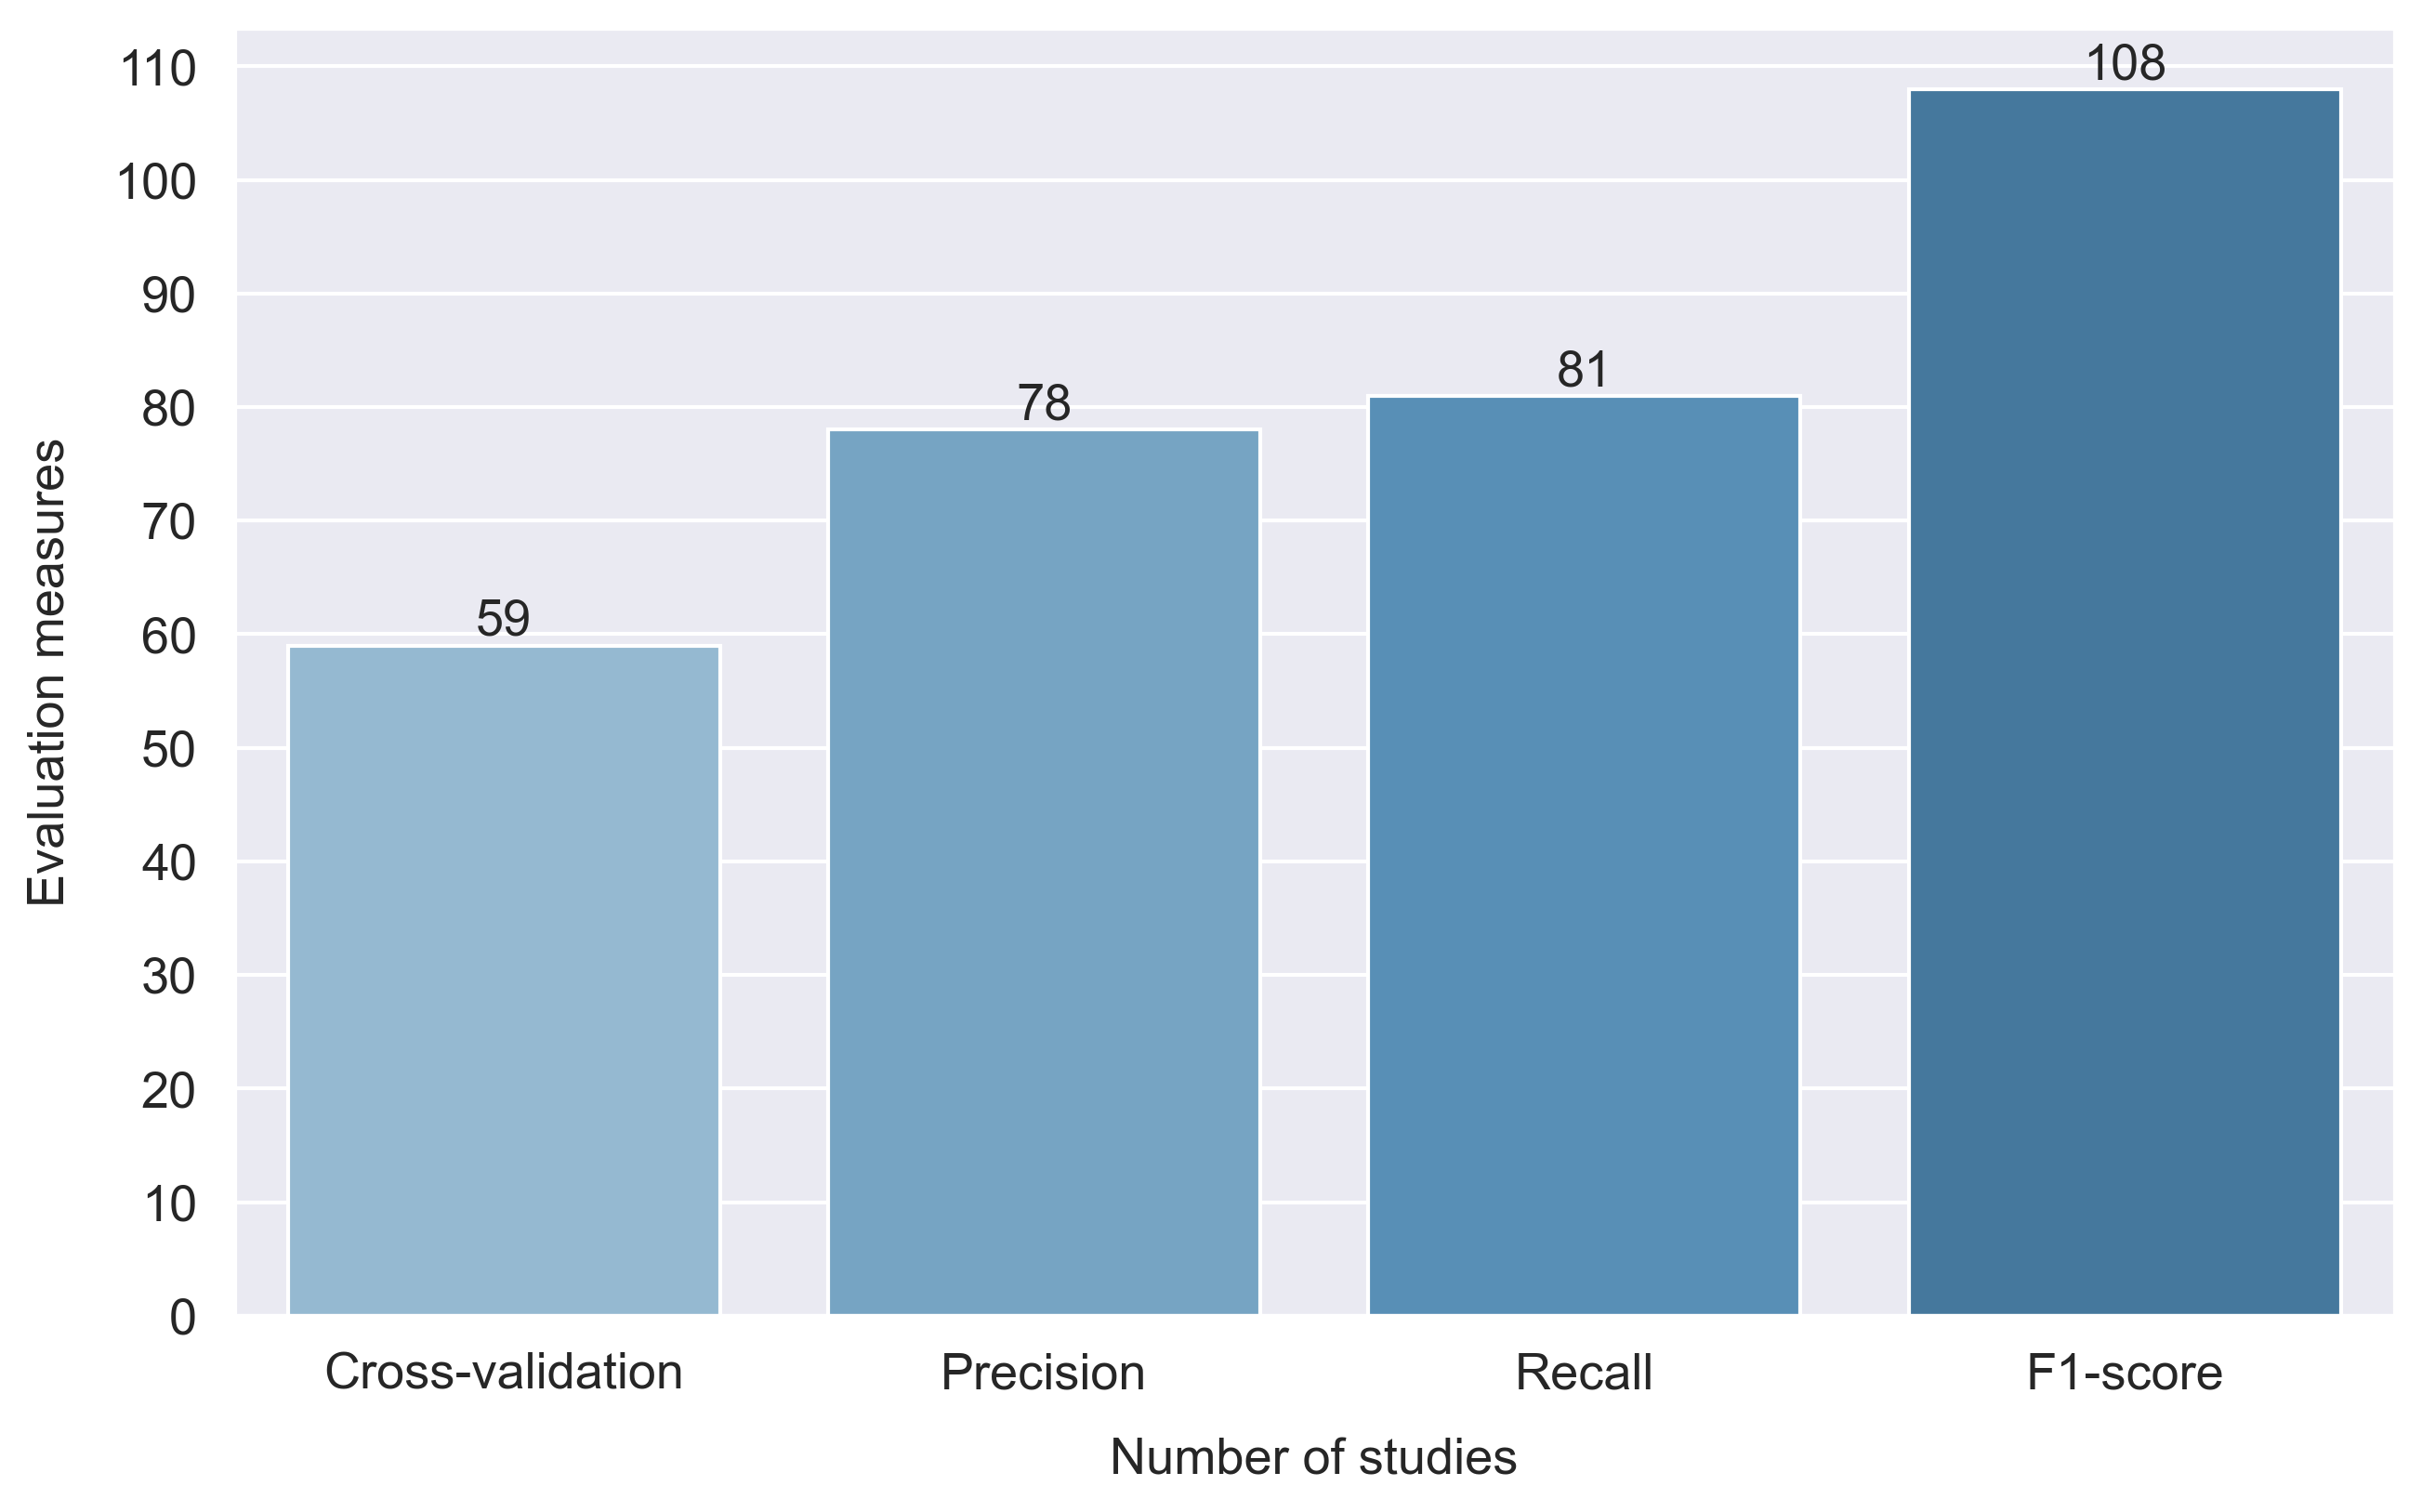

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1, font='sans serif')
plt.figure(figsize=(10, 6), dpi=300)

# Selecionando apenas os 4 primeiros dados da lista
list_metric = list_metric[:4]

# Ordenando a lista de forma ascendente
list_metric.sort(key=lambda x: x[1])

# Criando uma lista de rótulos e valores
labels = [metric[0] for metric in list_metric]
values = [metric[1] for metric in list_metric]

# Criando o gráfico de barras invertidas
f = sns.barplot(x=labels, y=values, palette=sns.color_palette("Blues_d"))

# Adicionando os valores acima das barras
for i, value in enumerate(values):
    f.text(i, value, str(value), ha='center', va='bottom', fontsize=13)

f.set_title('', fontsize=20)
f.set_xlabel('Number of studies', fontsize=13, labelpad=10)
f.set_ylabel('Evaluation measures', fontsize=13, labelpad=10)
f.tick_params(labelsize=13)
f.set_yticks(range(0, 120, 10))
plt.show()


## 6. Natureza dos dados

In [68]:
list_natur = df['Natureza_dos_dados'].tolist()
list5 = ','.join(list_natur).replace("'","")
metrics = list5.split(',')
contar_natur = Counter(metrics)#.most_common()
contar_natur

Counter({'corpus construido/coletado': 110,
         'nao descrito': 1,
         'corpus ja disponivel': 75})

## 7. Fontes de dados

In [70]:
import collections
from collections import Counter

#Transformando a coluna em uma lista
lista = df['Fonte_de_dados'].tolist()
#Removendo as aspas da lista
lista1 = ','.join(lista).replace("'","")
#Dividindo cada linha da lista através das vírgulas
palavras = lista1.split(',')

#Usando a biblioteca Counter para contar cada elemento (palavra)
contar_dados = Counter(palavras)#.most_common()
contar_dados = Counter({chave: valor for chave, valor in contar_dados.items() if chave != ''})
contar_dados

Counter({'twitter': 46,
         'uol': 5,
         'folha de sao paulo': 4,
         'g1': 4,
         'facebook': 3,
         'tripadvisor': 7,
         'skoob.com': 1,
         'essay-br': 1,
         'buscape': 3,
         'noticias agricolas': 2,
         'macrotrends': 1,
         'cepea': 2,
         'electronic invoices (nf-e)': 1,
         'assin': 8,
         'assin2': 5,
         'snli': 1,
         'coliee': 1,
         'senado federal': 1,
         'ouvidoria': 1,
         'jira (atlassian pty ltd)': 1,
         'morphobr': 1,
         'porgram': 1,
         'petroles': 1,
         'pubmed': 2,
         'goemotions (reddit)': 1,
         'diabetes mellitus': 1,
         'nao descrito': 26,
         'reddit': 3,
         'americanas': 2,
         'e-commerce': 5,
         'quintoandar chatbot': 1,
         'plos one': 1,
         'megalite- es': 1,
         'fake.br': 4,
         'dell accessible learning (dal)': 1,
         'camara dos deputados': 5,
         'kollemata pr

In [72]:
list_font = Counter(palavras).most_common()
list_font [:10]

[('twitter', 46),
 ('nao descrito', 26),
 ('assin', 8),
 ('wikipedia', 8),
 ('tripadvisor', 7),
 ('uol', 5),
 ('assin2', 5),
 ('e-commerce', 5),
 ('camara dos deputados', 5),
 ('sistema judiciario', 5)]